# Информационный поиск

__Автор задач: Блохин Н.В. (NVBlokhin@fa.ru)__

Материалы:
* https://nlp.stanford.edu/~manning/xyzzy/Intro_Inform_Retrieval_Russian.pdf
* https://en.wikipedia.org/wiki/Jaccard_index
* https://en.wikipedia.org/wiki/TF-IDF
* https://en.wikipedia.org/wiki/Okapi_BM25

## Задачи для совместного разбора

1\. Дан корпус текстов. Построить прямой и обратный индексы для слов из текста

In [ ]:
corpus = [
    "Первым специальным индексом для запросов с джокером общего вида является перестановочный индекс",
    "Методы усовершенствования индексов для расширения функциональных возможностей и повышения скорости поиска"
]

In [ ]:
import nltk
from nltk import word_tokenize
nltk.download('punkt_tab')

word_tokenize("")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


[]

In [ ]:
index = {}
for idx, sent in enumerate(corpus):
  tokens = word_tokenize(sent.lower())
  index[idx] = tokens

index

{0: ['первым',
  'специальным',
  'индексом',
  'для',
  'запросов',
  'с',
  'джокером',
  'общего',
  'вида',
  'является',
  'перестановочный',
  'индекс'],
 1: ['методы',
  'усовершенствования',
  'индексов',
  'для',
  'расширения',
  'функциональных',
  'возможностей',
  'и',
  'повышения',
  'скорости',
  'поиска']}

In [ ]:
from collections import defaultdict

In [ ]:
inversed_index = defaultdict(list)

for doc_idx, tokens in index.items():
  for token in tokens:
    inversed_index[token].append(doc_idx)
inversed_index

defaultdict(list,
            {'первым': [0],
             'специальным': [0],
             'индексом': [0],
             'для': [0, 1],
             'запросов': [0],
             'с': [0],
             'джокером': [0],
             'общего': [0],
             'вида': [0],
             'является': [0],
             'перестановочный': [0],
             'индекс': [0],
             'методы': [1],
             'усовершенствования': [1],
             'индексов': [1],
             'расширения': [1],
             'функциональных': [1],
             'возможностей': [1],
             'и': [1],
             'повышения': [1],
             'скорости': [1],
             'поиска': [1]})

2\. Посчитать индекс Жаккара для предложений из заданного корпуса.

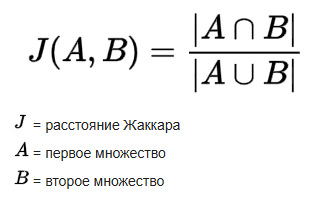

In [ ]:
index[0]

['первым',
 'специальным',
 'индексом',
 'для',
 'запросов',
 'с',
 'джокером',
 'общего',
 'вида',
 'является',
 'перестановочный',
 'индекс']

In [ ]:
set1, set2 = set(index[0]), set(index[1])

In [ ]:
set1.intersection(set2), set1.union(set2)

({'для'},
 {'вида',
  'возможностей',
  'джокером',
  'для',
  'запросов',
  'и',
  'индекс',
  'индексов',
  'индексом',
  'методы',
  'общего',
  'первым',
  'перестановочный',
  'повышения',
  'поиска',
  'расширения',
  'с',
  'скорости',
  'специальным',
  'усовершенствования',
  'функциональных',
  'является'})

In [ ]:
intersection = len(set1.intersection(set2))
union = len(set1.union(set2))

intersection / union

0.045454545454545456

## Задачи для самостоятельного решения

### 1.

<p class="task" id="1"></p>

1\. Считайте тексты новостей из файла `news.json`. Назовём прямым индексом словарь, где ключами являются номера новостей, а значениями - списки нормализованных слов, входящих в эту новость. Номер новости определяется ее положением в файле. Назовём обратным индексом словарь, где ключами являются нормальные формы слов, а значениями - множества номеров новостей, которые содержат данное слово (не обязательно в нормальной форме). Постройте прямой и обратный индекс. Выведите из длины на экран. Выведите значения обратного индекса по ключу "москва".

- [ ] Проверено на семинаре

In [ ]:
import json

with open('/content/news.json', 'r', encoding='utf-8') as f:
    corpus = json.load(f)

corpus[:2]

['российский бюджет в марте недополучил более 300 миллиардов рублей нефтегазовых доходов',
 'банк россии решил снизить ключевую ставку с 20  до 17 ']

In [ ]:
!pip install pymorphy3

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.8/53.8 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.4/8.4 MB 50.5 MB/s eta 0:00:00


In [ ]:
import pymorphy3
import nltk
from nltk.tokenize import RegexpTokenizer
nltk.download('punkt_tab')

tokenizer = RegexpTokenizer(r"\w+")
morph = pymorphy3.MorphAnalyzer()

word_tokenize("")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


[]

In [ ]:
index = {}
for idx, news in enumerate(corpus):
  tokens = tokenizer.tokenize(news.lower())
  lemm_tokens = [morph.parse(t)[0].normal_form for t in tokens]
  index[idx] = lemm_tokens

index

{0: ['российский',
  'бюджет',
  'в',
  'март',
  'недополучить',
  'более',
  '300',
  'миллиард',
  'рубль',
  'нефтегазовый',
  'доход'],
 1: ['банк',
  'россия',
  'решить',
  'снизить',
  'ключевой',
  'ставка',
  'с',
  '20',
  'до',
  '17'],
 2: ['мыс',
  'идокопас',
  'в',
  'нато',
  'назвать',
  'первый',
  'цель',
  'для',
  'начало',
  'полномасштабный',
  'вторжение',
  'в',
  'россия'],
 3: ['минобороны',
  'рф',
  'заявить',
  'о',
  'удар',
  'ракета',
  'калибр',
  'по',
  'запорожский',
  'алюминиевый',
  'комбинат',
  'и',
  'уничтожение',
  'ангар',
  'с',
  'иностранный',
  'оружие'],
 4: ['госдеп',
  'попросить',
  'россия',
  'исключить',
  'сант',
  'клаус',
  'из',
  'санкционный',
  'список',
  'на',
  'время',
  'рождественский',
  'праздник'],
 5: ['я',
  'она',
  'не',
  'трогать',
  'распустить',
  'язык',
  'пригожина',
  'отпихнуть',
  'от',
  'себя',
  'оскандалиться',
  'вайкуль'],
 6: ['приложение', 'аэрофлот', 'большой', 'недоступный', 'в', 'app', 's

In [ ]:
inversed_index = defaultdict(set)

for doc_idx, tokens in index.items():
  for token in tokens:
    inversed_index[token].add(doc_idx)

inversed_index

defaultdict(set,
            {'российский': {0,
              10,
              17,
              35,
              43,
              48,
              71,
              81,
              101,
              104,
              114,
              122,
              125,
              129,
              135,
              151,
              160,
              167,
              216,
              219,
              229,
              254,
              259,
              266,
              300,
              301,
              396,
              399,
              437,
              442,
              451,
              456,
              472},
             'бюджет': {0, 204},
             'в': {0,
              2,
              6,
              11,
              16,
              20,
              24,
              28,
              30,
              31,
              32,
              33,
              34,
              35,
              37,
              40,
              41,
         

In [ ]:
len(index)

500

In [ ]:
len(inversed_index)

2435

In [ ]:
inversed_index.get('москва')

{10,
 28,
 32,
 88,
 111,
 134,
 148,
 176,
 182,
 190,
 199,
 205,
 207,
 225,
 240,
 275,
 280,
 297,
 324,
 350,
 374,
 416,
 466,
 486}

### 2.

<p class="task" id="2"></p>

2\. Для каждого документа из текста определите, как часто слова этого документа встречаются в заданном тексте, воспользовавшись обратным индексом. Выведите на экран текст топ-3 новостей, наиболее похожих по набору токенов на заданный текст. Выведите на экран текст найденных новостей и количество совпадающих токенов.

- [ ] Проверено на семинаре

In [ ]:
example = "Жириновский предложил перенести столицу из Москвы"

In [ ]:
ex_tokens = tokenizer.tokenize(example.lower())
lemm_ex = {morph.parse(t)[0].normal_form for t in ex_tokens}

In [ ]:
sovp = []

for doc_idx, tokens in index.items():
    count = lemm_ex.intersection(set(tokens))
    sovp.append((doc_idx, len(count)))  # номер документа и число совпадений

sovp[:10]

[(0, 0),
 (1, 0),
 (2, 0),
 (3, 0),
 (4, 1),
 (5, 0),
 (6, 0),
 (7, 0),
 (8, 0),
 (9, 3)]

In [ ]:
sovp.sort(key = lambda x: x[1], reverse = True)

In [ ]:
sovp

[(9, 3),
 (32, 2),
 (36, 2),
 (78, 2),
 (112, 2),
 (182, 2),
 (240, 2),
 (270, 2),
 (318, 2),
 (374, 2),
 (4, 1),
 (10, 1),
 (13, 1),
 (16, 1),
 (28, 1),
 (29, 1),
 (43, 1),
 (51, 1),
 (60, 1),
 (71, 1),
 (74, 1),
 (75, 1),
 (80, 1),
 (88, 1),
 (91, 1),
 (101, 1),
 (111, 1),
 (134, 1),
 (140, 1),
 (145, 1),
 (148, 1),
 (149, 1),
 (154, 1),
 (166, 1),
 (169, 1),
 (170, 1),
 (176, 1),
 (185, 1),
 (187, 1),
 (190, 1),
 (196, 1),
 (199, 1),
 (205, 1),
 (207, 1),
 (209, 1),
 (210, 1),
 (212, 1),
 (224, 1),
 (225, 1),
 (234, 1),
 (235, 1),
 (238, 1),
 (239, 1),
 (242, 1),
 (248, 1),
 (249, 1),
 (250, 1),
 (251, 1),
 (257, 1),
 (275, 1),
 (280, 1),
 (283, 1),
 (287, 1),
 (290, 1),
 (292, 1),
 (293, 1),
 (297, 1),
 (301, 1),
 (308, 1),
 (309, 1),
 (310, 1),
 (323, 1),
 (324, 1),
 (327, 1),
 (329, 1),
 (330, 1),
 (349, 1),
 (350, 1),
 (351, 1),
 (360, 1),
 (362, 1),
 (373, 1),
 (375, 1),
 (381, 1),
 (383, 1),
 (389, 1),
 (394, 1),
 (396, 1),
 (409, 1),
 (415, 1),
 (416, 1),
 (442, 1),
 (448, 1)

In [ ]:
sovp[:3]

[(9, 3), (32, 2), (36, 2)]

In [ ]:
for doc_idx, count in sovp[:3]:
    print(f"\nновость {doc_idx} (совпадений - {count}):")
    print(f'<< {corpus[doc_idx]} >>')


новость 9 (совпадений - 3):
<< трамп предложил перенести новые санкции против россии из за дня народного единства  >>

новость 32 (совпадений - 2):
<< автора канала «протестный мгу» арестовали на 10 суток в москве  накануне его задержали при выходе из университета >>

новость 36 (совпадений - 2):
<< международную универсиаду 2023 года перенесут из екатеринбурга >>


### 3.

<p class="task" id="3"></p>

3\. Для заданного текста новости найдите топ-3 наиболее похожих новости, воспользовавшись коэффициентом Жаккара. Для определения количества общих слов в тексте используйте обратный индекс.  Выведите на экран текст найденных новостей и значение коэффициента Жаккара для каждой новости.

- [ ] Проверено на семинаре

In [ ]:
example = "Жириновский предложил перенести столицу из Москвы"

In [ ]:
ex_tokens = tokenizer.tokenize(example.lower())
lemm_ex = {morph.parse(t)[0].normal_form for t in ex_tokens}

In [ ]:
sovp = []

for doc_idx, tokens in index.items():
    #coef_j = len(lemm_ex.intersection(tokens)) / len(lemm_ex.union(tokens))
    coef_j = len(lemm_ex & tokens) / len(lemm_ex | tokens)
    sovp.append((doc_idx, coef_j))  # номер документа и коэфф жак

sovp[:10]

[(0, 0.0),
 (1, 0.0),
 (2, 0.0),
 (3, 0.0),
 (4, 0.05555555555555555),
 (5, 0.0),
 (6, 0.0),
 (7, 0.0),
 (8, 0.0),
 (9, 0.2)]

In [ ]:
sovp.sort(key=lambda x: x[1], reverse=True)

In [ ]:
sovp[:10]

[(9, 0.2),
 (36, 0.18181818181818182),
 (270, 0.18181818181818182),
 (78, 0.16666666666666666),
 (112, 0.14285714285714285),
 (182, 0.13333333333333333),
 (318, 0.13333333333333333),
 (32, 0.09523809523809523),
 (196, 0.09090909090909091),
 (297, 0.09090909090909091)]

In [ ]:
for doc_idx, coef_j in sovp[:3]:
    print(f"\nновость {doc_idx} (коэф. Жаккара = {coef_j:.3f}):")
    print(f'<< {corpus[doc_idx]} >>')


новость 9 (коэф. Жаккара = 0.200):
<< трамп предложил перенести новые санкции против россии из за дня народного единства  >>

новость 36 (коэф. Жаккара = 0.182):
<< международную универсиаду 2023 года перенесут из екатеринбурга >>

новость 270 (коэф. Жаккара = 0.182):
<< токаев предложил исключить россию из состава снг  >>


### 4.

<p class="task" id="4"></p>

4\. Реализуйте функцию для расчета TF-IDF.
![image.png](attachment:image.png)
![image-2.png](attachment:image-2.png)
![image-3.png](attachment:image-3.png)

Для расчета обратной частоты документа воспользуйтесь обратным индексом из предыдущей задачи. При расчете IDF добавьте сглаживание, прибавив единицу к числителю и знаменателю дроби.

- [ ] Проверено на семинаре

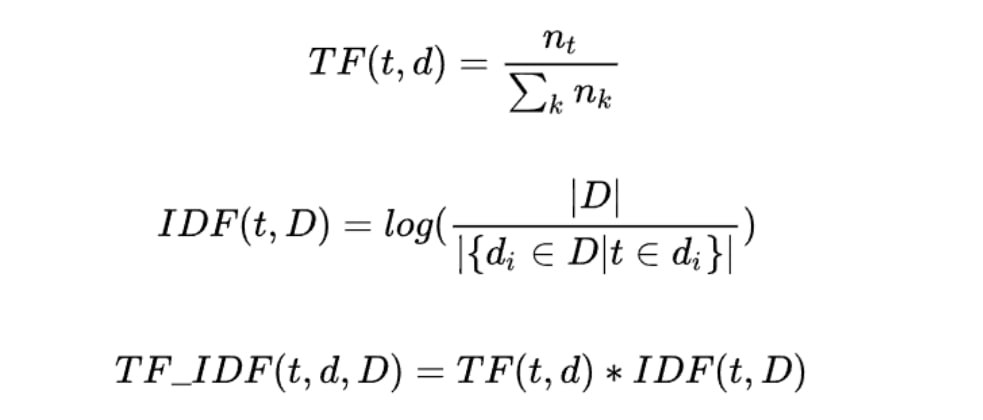

In [ ]:
def TF(t, tokens):  # частота слова в доке
  return tokens.count(t) / len(tokens)

In [ ]:
import math

def IDF(t, inversed_index, index):
  znam = len(inversed_index.get(t, [])) # число документов с этим словом
  return math.log((len(index)+1)/(znam + 1)) # число документов / znam

In [ ]:
def TF_IDF(tokens, index, inversed_index):
  scores = {}
  for t in set(tokens):
    tf = TF(t, tokens)
    idf = IDF(t, inversed_index, index)
    scores[t] = tf * idf
  return scores

In [ ]:
example = index[17]
example

['венгрия',
 'пригрозить',
 'заблокировать',
 'попытка',
 'ес',
 'расширить',
 'запрет',
 'на',
 'импорт',
 'российский',
 'энергоноситель']

In [ ]:
tf_idf = TF_IDF(example, index, inversed_index)
tf_idf

{'ес': 0.3558200916446199,
 'заблокировать': 0.41883347169552404,
 'запрет': 0.41883347169552404,
 'венгрия': 0.43911924908772487,
 'на': 0.13538348021568403,
 'расширить': 0.502132629138629,
 'импорт': 0.502132629138629,
 'российский': 0.24456777967897306,
 'попытка': 0.4652721647651596,
 'пригрозить': 0.41883347169552404,
 'энергоноситель': 0.502132629138629}

In [ ]:
tf_idf_s = sorted(tf_idf.items(), key=lambda x: x[1], reverse=True)

In [ ]:
print('топ-5 слов по TF-IDF в документе:')
for t, score in tf_idf_s[:5]:
  print(f'{t}: {score:.5f}')

топ-5 слов по TF-IDF в документе:
расширить: 0.50213
импорт: 0.50213
энергоноситель: 0.50213
попытка: 0.46527
венгрия: 0.43912


### 5.

<p class="task" id="5"></p>

5\. Используя собственную реализацию TD-IDF, закодируйте новости. Результатом должна являться матрица `MxN`, где `M` - количество новостей в корпусе, `N` - размер обратного индекса. Выведите форму полученной матрицы на экран.

- [ ] Проверено на семинаре

In [ ]:
M = len(index)
M

500

In [ ]:
vocab = list(inversed_index.keys())
N = len(vocab)
N

2435

In [ ]:
import numpy as np

matrix = np.zeros((M, N))

In [ ]:
index[0]

['российский',
 'бюджет',
 'в',
 'март',
 'недополучить',
 'более',
 '300',
 'миллиард',
 'рубль',
 'нефтегазовый',
 'доход']

In [ ]:
word_idx = {word: idx for idx, word in enumerate(vocab)}
word_idx

{'российский': 0,
 'бюджет': 1,
 'в': 2,
 'март': 3,
 'недополучить': 4,
 'более': 5,
 '300': 6,
 'миллиард': 7,
 'рубль': 8,
 'нефтегазовый': 9,
 'доход': 10,
 'банк': 11,
 'россия': 12,
 'решить': 13,
 'снизить': 14,
 'ключевой': 15,
 'ставка': 16,
 'с': 17,
 '20': 18,
 'до': 19,
 '17': 20,
 'мыс': 21,
 'идокопас': 22,
 'нато': 23,
 'назвать': 24,
 'первый': 25,
 'цель': 26,
 'для': 27,
 'начало': 28,
 'полномасштабный': 29,
 'вторжение': 30,
 'минобороны': 31,
 'рф': 32,
 'заявить': 33,
 'о': 34,
 'удар': 35,
 'ракета': 36,
 'калибр': 37,
 'по': 38,
 'запорожский': 39,
 'алюминиевый': 40,
 'комбинат': 41,
 'и': 42,
 'уничтожение': 43,
 'ангар': 44,
 'иностранный': 45,
 'оружие': 46,
 'госдеп': 47,
 'попросить': 48,
 'исключить': 49,
 'сант': 50,
 'клаус': 51,
 'из': 52,
 'санкционный': 53,
 'список': 54,
 'на': 55,
 'время': 56,
 'рождественский': 57,
 'праздник': 58,
 'я': 59,
 'она': 60,
 'не': 61,
 'трогать': 62,
 'распустить': 63,
 'язык': 64,
 'пригожина': 65,
 'отпихнуть': 66,

In [ ]:
word_idx['на']

55

In [ ]:
def tf_idf(t, index, inversed_index):
    tf = TF(t, tokens)
    idf = IDF(t, inversed_index, index)
    return tf * idf

In [ ]:
for doc_idx, tokens in index.items():
  for t in set(tokens):
    matrix[doc_idx, word_idx[t]] = tf_idf(t, index, inversed_index)

print(matrix)

[[0.24456778 0.46527216 0.07648434 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.12943503 ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.78906556 0.78906556 0.        ]
 [0.         0.         0.         ... 0.         0.         0.69043237]]


### 6.

<p class="task" id="6"></p>

6\. Для заданного текста новости найдите топ-3 наиболее похожих новости, воспользовавшись матрицей TD-IDF из предыдущего задания. Для определения схожести используйте функцию косинусного расстояния. Выведите на экран текст найденных новостей и значение метрики близости для каждой новости.

- [ ] Проверено на семинаре

In [ ]:
example = "Жириновский предложил перенести столицу из Москвы"

In [ ]:
ex_tokens = tokenizer.tokenize(example.lower())
lemm_ex = [morph.parse(t)[0].normal_form for t in ex_tokens]

In [ ]:
vector = np.zeros(len(word_idx))
scores = TF_IDF(lemm_ex, index, inversed_index)

for t, score in scores.items():
  if t in word_idx:
    vector[word_idx[t]] = score

In [ ]:
print(vector)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
any(vector)

True

In [ ]:
from collections import Counter

Counter(vector)

Counter({0.0: 2429,
         0.35095537281859224: 1,
         0.5209272746210915: 1,
         0.805051956660829: 2,
         0.49962171270277733: 1,
         0.9205764867541532: 1})

In [ ]:
from scipy.spatial.distance import cosine

# косинусное расстояние между vector и всеми строками в матрице

dist = []
for doc_idx in range(M):
  doc_vector = matrix[doc_idx, :]
  if any(vector) or any(doc_vector):
    similarity = 1 - cosine(vector, doc_vector)
  else:
    similarity = 0
  dist.append((doc_idx, similarity))

In [ ]:
dist.sort(key=lambda x: x[1], reverse=True)

In [ ]:
dist[:5]

[(9, 0.29136232414929175),
 (78, 0.2461054055389077),
 (318, 0.22914696858029793),
 (36, 0.2275381230984609),
 (330, 0.21615542334132465)]

In [ ]:
for doc_idx, sim in dist[:3]:
    print(f"\nновость {doc_idx} (схожесть {sim:.4f}):")
    print(f'<< {corpus[doc_idx]} >>')


новость 9 (схожесть 0.2914):
<< трамп предложил перенести новые санкции против россии из за дня народного единства  >>

новость 78 (схожесть 0.2461):
<< 31 декабря владимир жириновский предложит имя своего преемника  >>

новость 318 (схожесть 0.2291):
<< власти израиля предложили перенести территорию палестины на остров в средиземном море  >>


### 7.

<p class="task" id="7"></p>

7\. Для заданного текста новости найдите топ-3 наиболее похожих новости, воспользовавшись любой реализацией функции ранжирования [BM25](https://en.wikipedia.org/wiki/Okapi_BM25). Выведите на экран текст найденных новостей и значение метрики ранжирования для каждой новости.

- [ ] Проверено на семинаре

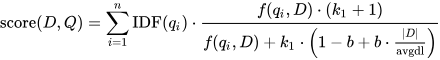

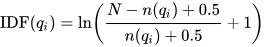

In [ ]:
example = "Жириновский предложил перенести столицу из Москвы"

In [ ]:
ex_tokens = tokenizer.tokenize(example.lower())
lemm_ex = [morph.parse(t)[0].normal_form for t in ex_tokens]

In [ ]:
k = 1.5
b = 0.75

In [ ]:
def IDF_BM25(inversed_index, index):
  N = len(index)
  idf = {}

  for t, doc_idx in inversed_index.items():
    n = len(doc_idx)
    idf[t] = np.log((N - n + 0.5)/(n+0.5)+1)
  return idf

In [ ]:
avg_dl = np.mean([len(doc) for doc in index.values()])
idf = IDF_BM25(inversed_index, index)

bm25_scores = {}
for doc_idx, tokens in index.items():
  score = 0
  doc_l = len(tokens) # длина новости

  for t in set(lemm_ex):
    if t in idf:
      tf = tokens.count(t) # частота слова
      idf_t = idf[t]

      chisl = tf*(k+1)
      znam = tf + k*(1-b + b * doc_l/avg_dl)
      score+= idf_t * (chisl/znam)
  bm25_scores[doc_idx] = score

bm25_scores

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 1.9364544147005214,
 5: 0.0,
 6: 0.0,
 7: 0.0,
 8: 0.0,
 9: 9.73938955675125,
 10: 2.764518763542764,
 11: 0.0,
 12: 0.0,
 13: 3.403841260487835,
 14: 0.0,
 15: 0.0,
 16: 1.737503618669646,
 17: 0.0,
 18: 0.0,
 19: 0.0,
 20: 0.0,
 21: 0.0,
 22: 0.0,
 23: 0.0,
 24: 0.0,
 25: 0.0,
 26: 0.0,
 27: 0.0,
 28: 1.801751034945781,
 29: 1.8652612376894726,
 30: 0.0,
 31: 0.0,
 32: 4.078327724171326,
 33: 0.0,
 34: 0.0,
 35: 0.0,
 36: 8.409274299371363,
 37: 0.0,
 38: 0.0,
 39: 0.0,
 40: 0.0,
 41: 0.0,
 42: 0.0,
 43: 1.8652612376894726,
 44: 0.0,
 45: 0.0,
 46: 0.0,
 47: 0.0,
 48: 0.0,
 49: 0.0,
 50: 0.0,
 51: 1.737503618669646,
 52: 0.0,
 53: 0.0,
 54: 0.0,
 55: 0.0,
 56: 0.0,
 57: 0.0,
 58: 0.0,
 59: 0.0,
 60: 2.096491969634449,
 61: 0.0,
 62: 0.0,
 63: 0.0,
 64: 0.0,
 65: 0.0,
 66: 0.0,
 67: 0.0,
 68: 0.0,
 69: 0.0,
 70: 0.0,
 71: 2.096491969634449,
 72: 0.0,
 73: 0.0,
 74: 2.096491969634449,
 75: 3.740855246674749,
 76: 0.0,
 77: 0.0,
 78: 9.18384486627

In [ ]:
bm25_scores = sorted(bm25_scores.items(), key=lambda x: x[1], reverse=True)
bm25_scores[:10]

[(9, 9.73938955675125),
 (78, 9.183844866272542),
 (36, 8.409274299371363),
 (112, 8.392134101938701),
 (318, 8.045351701032144),
 (270, 6.2524941409892865),
 (140, 5.8976354050568265),
 (330, 5.763115034357059),
 (182, 5.089483358263392),
 (240, 4.457700830953325)]

In [ ]:
for doc_idx, score in bm25_scores[:3]:
    print(f"\nновость {doc_idx} (схожесть по BM25 = {score:.4f}):")
    print(f'<< {corpus[doc_idx]} >>')


новость 9 (схожесть по BM25 = 9.7394):
<< трамп предложил перенести новые санкции против россии из за дня народного единства  >>

новость 78 (схожесть по BM25 = 9.1838):
<< 31 декабря владимир жириновский предложит имя своего преемника  >>

новость 36 (схожесть по BM25 = 8.4093):
<< международную универсиаду 2023 года перенесут из екатеринбурга >>
